<a href="https://colab.research.google.com/github/Youngpama21/pythonprojects/blob/main/enrollment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
#loading the data
df = pd.read_csv('StudentsPerformance.csv')

In [89]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [90]:
df.shape

(1000, 8)

In [91]:
#renaming the titles
df.rename(columns={"race/ethnicity":"ethnicity","parental level of education":"parent_education"
                    ,"math score":"math","reading score":"reading","writing score":"writing",
                    "test preparation course":"pre"},inplace=True)
df.head()

,gender,ethnicity,parent_education,lunch,pre,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [92]:
#setting the passing threshold
passing_threshold = 60
df['pass'] = (df['math'] >= passing_threshold).astype(int)

In [96]:
#defining categorical and numerical features
categorical_features = ['gender', 'ethnicity', 'parent_education', 'lunch', 'pre']
numerical_features = ['reading', 'writing']

#creating a processing pipleline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ]
)


In [102]:
#pcreating a pipleline with model
pipline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42)),
])

In [103]:
df.dtypes

,0
gender,object
ethnicity,object
parent_education,object
lunch,object
pre,object
math,int64
reading,int64
writing,int64
pass,int64


In [104]:
#splitting the data
x = df[categorical_features + numerical_features]
y = df['pass']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [105]:
#train and evaluating model
pipline.fit(x_train, y_train)
y_pred = pipline.predict(x_test)

In [124]:
#evaluating the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'accuracy: {accuracy}')
print('classification report:\n', report)

accuracy: 0.885
classification report:
               precision    recall  f1-score   support

           0       0.90      0.76      0.82        70
           1       0.88      0.95      0.92       130

    accuracy                           0.89       200
   macro avg       0.89      0.86      0.87       200
weighted avg       0.89      0.89      0.88       200



0--fail/additional support
1--pass/successful for enrollment

In [125]:
#new data
new_data = pd.DataFrame({
    'gender': ['male'],
    'ethnicity': ['group c'],
    'parent_education': ['some college'],
    'lunch': ['standard'],
    'pre': ['none'],
    'reading': [50],
    'writing': [55]

})
prediction = pipline.predict(new_data)
print(f'prediction: {prediction}')

prediction: [1]


In [126]:
#saving the model
import joblib
joblib.dump(pipline, 'student_prediction_model.pkl')

['student_prediction_model.pkl']

**visualization**

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

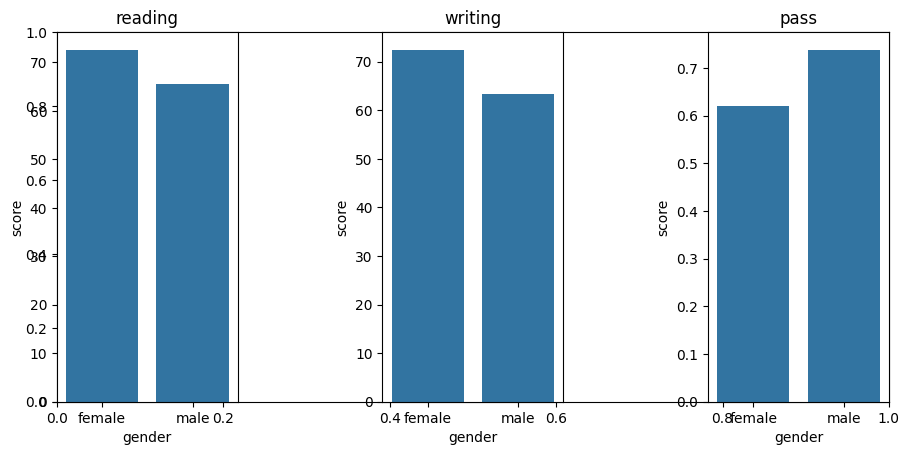

In [130]:
#performance of each field for male and female

fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right=1.5)
for idx in range(3):
  plt.subplot(1,3, idx+1)
  gender_df = df.groupby('gender')[list(df.columns[-3:])[idx]].describe()
  sns.barplot(x=gender_df.index, y=gender_df.loc[:, 'mean'].values)
  plt.ylabel('score')
  plt.title(list(df.columns[-3:])[idx])

plt.show()

<ipython-input-133-9600bb21614b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ethnicity_df.index, y=ethnicity_df.values, palette= 'Greens')
<ipython-input-133-9600bb21614b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ethnicity_df.index, y=ethnicity_df.values, palette= 'Greens')
<ipython-input-133-9600bb21614b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ethnicity_df.index, y=ethnicity_df.values, palette= 'Greens')


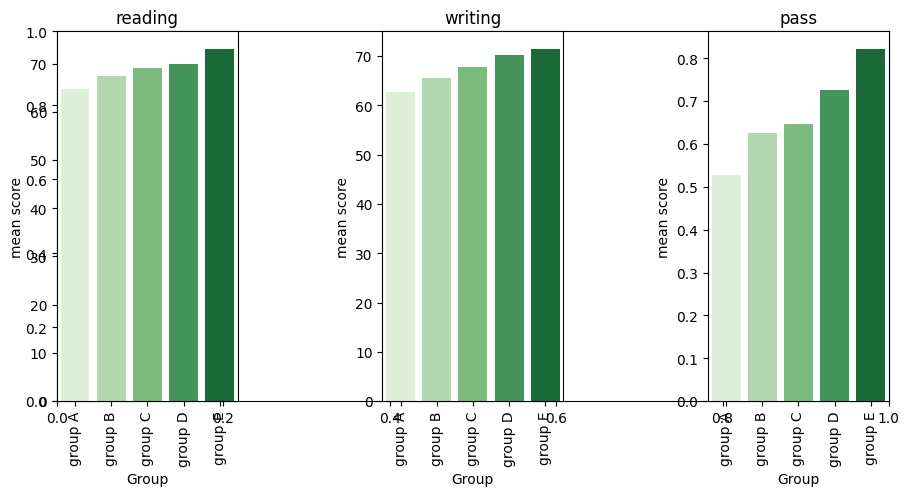

In [133]:
#performance of ethnicity
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right=1.5)
for idx in range(3):
  plt.subplot(1,3, idx+1)
  ethnicity_df = df.groupby('ethnicity')[list(df.columns[-3:])[idx]].mean()
  sns.barplot(x=ethnicity_df.index, y=ethnicity_df.values, palette= 'Greens')
  plt.xlabel('Group')
  plt.ylabel('mean score')
  plt.xticks(rotation=90)
  plt.title(list(df.columns[-3:])[idx])

plt.show()

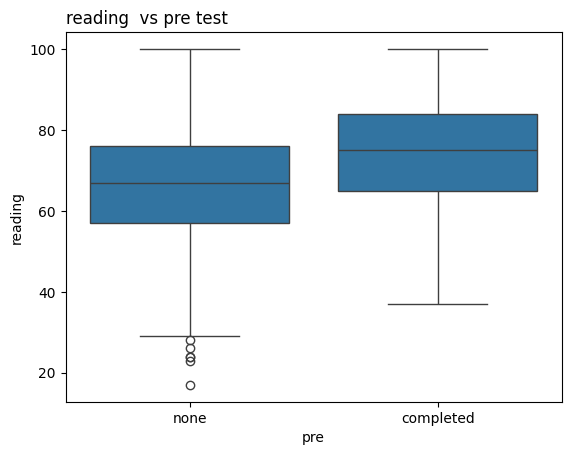

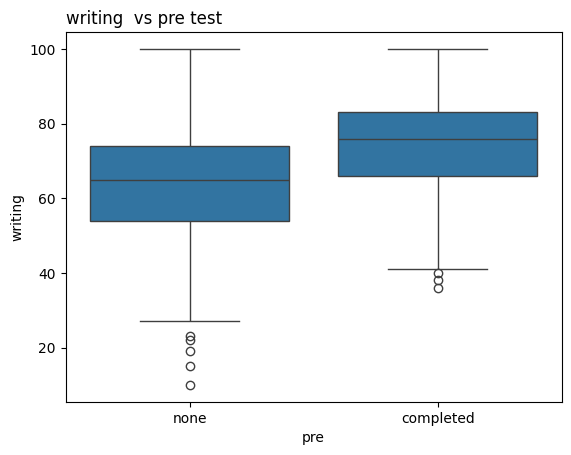

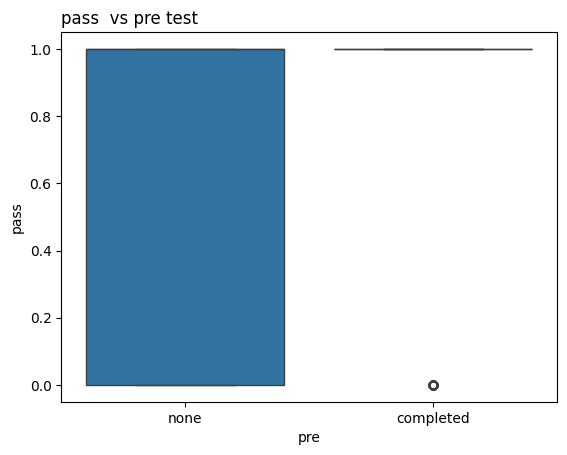

In [135]:
#score and test preparations

for item in df.columns[-3:]:
  sns.boxplot(x=df['pre'], y = df[item])
  plt.title(item+'  vs pre test', loc='left')
  plt.show()